## Logic Based FizzBuzz Function [Software 1.0]

In [313]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [314]:
def createInputCSV(start,end,filename):
    
    # Why list in Python? A list is used to store the input and output data which are then passed as value for the key-value pairs in the dataset.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data? We work our model on training data so as to generate parameters that are used by our model to predict accurate outputs.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe? A python dictionary is used as a dataframe so as to have the inpur and outputa data at one place under the respective keys as inpur and labels.
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [315]:
def processData(dataset):
    
    # Why do we have to process? Inpur and output data is processed and converted into simple activators which are easy to process compared to actual labels.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [316]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10? We convert the data input into binary which is easy to process and is used as an activation vector passed to the neural network.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [317]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [318]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 2048
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model? A model is a well defined frame of processing with all the predefined hyperparameters and other parameters that define the system.
    # Why use Dense layer and then activation? In keras we can set different activation functions for different layers. this is done by defining the activation after the layer is defined.
    # Why use sequential model with layers? The fizzbuzz problem is not a linearly seprable problem and hence it needs a layers. The sequential API allows to create models layer-by-layer wherein every layer is only connected to the previous and for next layer which is enough for FizzBuzz and hence the sequential model with layers.
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout? Dropout is used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax? Softmax function calculates the probabilities distribution of the event over different events. It will calculate the probabilities of each target class over all possible target classes. since here we have 4 classes softmax works well.
    
    model.summary()
    
    # Why use categorical_crossentropy? categorical_crossentropy is used to calculate the loss of individual category(output label) treated as one vs all.
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [319]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [320]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 2048)              22528     
_________________________________________________________________
activation_53 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 4)                 8196      
_________________________________________________________________
activation_54 (Activation)   (None, 4)                 0         
Total params: 30,724
Trainable params: 30,724
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [321]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 1s 752us/step - loss: 1.2777 - acc: 0.4542 - val_loss: 1.1552 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 182us/step - loss: 1.1517 - acc: 0.5333 - val_loss: 1.1829 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 132us/step - loss: 1.1601 - acc: 0.5333 - val_loss: 1.1735 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 130us/step - loss: 1.1472 - acc: 0.5333 - val_loss: 1.1507 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 132us/step - loss: 1.1412 - acc: 0.5333 - val_loss: 1.1458 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 168us/step - loss: 1.1415 - acc: 0.5333 - val_loss: 1.1535 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 114us/step - loss: 1.1366 - acc: 0.5333 - val_loss: 1.1503 - val_acc: 0.

720/720 [==============================] - 0s 128us/step - loss: 0.6868 - acc: 0.7403 - val_loss: 0.9220 - val_acc: 0.6500
Epoch 60/10000
720/720 [==============================] - 0s 161us/step - loss: 0.6719 - acc: 0.7819 - val_loss: 0.9152 - val_acc: 0.6833
Epoch 61/10000
720/720 [==============================] - 0s 129us/step - loss: 0.6644 - acc: 0.7583 - val_loss: 0.9069 - val_acc: 0.6556
Epoch 62/10000
720/720 [==============================] - 0s 124us/step - loss: 0.6609 - acc: 0.7861 - val_loss: 0.9023 - val_acc: 0.6611
Epoch 63/10000
720/720 [==============================] - 0s 119us/step - loss: 0.6465 - acc: 0.7639 - val_loss: 0.8938 - val_acc: 0.6833
Epoch 64/10000
720/720 [==============================] - 0s 121us/step - loss: 0.6353 - acc: 0.8097 - val_loss: 0.8856 - val_acc: 0.6833
Epoch 65/10000
720/720 [==============================] - 0s 128us/step - loss: 0.6160 - acc: 0.8181 - val_loss: 0.8788 - val_acc: 0.6611
Epoch 66/10000
720/720 [=========================

720/720 [==============================] - 0s 135us/step - loss: 0.2394 - acc: 0.9806 - val_loss: 0.5348 - val_acc: 0.8722
Epoch 119/10000
720/720 [==============================] - 0s 119us/step - loss: 0.2359 - acc: 0.9792 - val_loss: 0.5271 - val_acc: 0.8778
Epoch 120/10000
720/720 [==============================] - 0s 124us/step - loss: 0.2432 - acc: 0.9750 - val_loss: 0.5293 - val_acc: 0.8611
Epoch 121/10000
720/720 [==============================] - 0s 111us/step - loss: 0.2227 - acc: 0.9792 - val_loss: 0.5278 - val_acc: 0.8667
Epoch 122/10000
720/720 [==============================] - 0s 119us/step - loss: 0.2276 - acc: 0.9778 - val_loss: 0.5231 - val_acc: 0.8778
Epoch 123/10000
720/720 [==============================] - 0s 136us/step - loss: 0.2178 - acc: 0.9861 - val_loss: 0.5167 - val_acc: 0.8778
Epoch 124/10000
720/720 [==============================] - 0s 122us/step - loss: 0.2268 - acc: 0.9708 - val_loss: 0.5083 - val_acc: 0.8778
Epoch 125/10000
720/720 [==================

Epoch 177/10000
720/720 [==============================] - 0s 139us/step - loss: 0.1074 - acc: 0.9944 - val_loss: 0.3790 - val_acc: 0.8944
Epoch 178/10000
720/720 [==============================] - 0s 121us/step - loss: 0.1080 - acc: 0.9931 - val_loss: 0.3791 - val_acc: 0.8833
Epoch 179/10000
720/720 [==============================] - 0s 114us/step - loss: 0.1132 - acc: 0.9903 - val_loss: 0.3638 - val_acc: 0.9000
Epoch 180/10000
720/720 [==============================] - 0s 136us/step - loss: 0.1037 - acc: 0.9931 - val_loss: 0.3799 - val_acc: 0.8889
Epoch 181/10000
720/720 [==============================] - 0s 137us/step - loss: 0.1072 - acc: 0.9875 - val_loss: 0.3700 - val_acc: 0.8889
Epoch 182/10000
720/720 [==============================] - 0s 129us/step - loss: 0.1085 - acc: 0.9917 - val_loss: 0.3713 - val_acc: 0.8889
Epoch 183/10000
720/720 [==============================] - 0s 119us/step - loss: 0.1055 - acc: 0.9931 - val_loss: 0.3622 - val_acc: 0.9000
Epoch 184/10000
720/720 [==

Epoch 236/10000
720/720 [==============================] - 0s 157us/step - loss: 0.0586 - acc: 0.9972 - val_loss: 0.3298 - val_acc: 0.8889
Epoch 237/10000
720/720 [==============================] - 0s 144us/step - loss: 0.0582 - acc: 0.9931 - val_loss: 0.3061 - val_acc: 0.9056
Epoch 238/10000
720/720 [==============================] - 0s 121us/step - loss: 0.0580 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.9056
Epoch 239/10000
720/720 [==============================] - ETA: 0s - loss: 0.0614 - acc: 0.992 - 0s 112us/step - loss: 0.0613 - acc: 0.9931 - val_loss: 0.2914 - val_acc: 0.9111
Epoch 240/10000
720/720 [==============================] - 0s 119us/step - loss: 0.0604 - acc: 0.9986 - val_loss: 0.3031 - val_acc: 0.9056
Epoch 241/10000
720/720 [==============================] - 0s 114us/step - loss: 0.0621 - acc: 0.9944 - val_loss: 0.2907 - val_acc: 0.9056
Epoch 242/10000
720/720 [==============================] - 0s 125us/step - loss: 0.0569 - acc: 1.0000 - val_loss: 0.2991 - val_a

720/720 [==============================] - 0s 129us/step - loss: 0.0354 - acc: 0.9986 - val_loss: 0.2675 - val_acc: 0.9222
Epoch 295/10000
720/720 [==============================] - 0s 136us/step - loss: 0.0407 - acc: 0.9958 - val_loss: 0.2914 - val_acc: 0.9000
Epoch 296/10000
720/720 [==============================] - 0s 124us/step - loss: 0.0428 - acc: 0.9972 - val_loss: 0.2758 - val_acc: 0.9056
Epoch 297/10000
720/720 [==============================] - 0s 118us/step - loss: 0.0405 - acc: 0.9986 - val_loss: 0.2921 - val_acc: 0.9056
Epoch 298/10000
720/720 [==============================] - 0s 121us/step - loss: 0.0395 - acc: 0.9972 - val_loss: 0.2793 - val_acc: 0.9056
Epoch 299/10000
720/720 [==============================] - 0s 122us/step - loss: 0.0381 - acc: 0.9972 - val_loss: 0.2863 - val_acc: 0.9056
Epoch 300/10000
720/720 [==============================] - 0s 117us/step - loss: 0.0383 - acc: 0.9958 - val_loss: 0.2426 - val_acc: 0.9333
Epoch 301/10000
720/720 [==================

720/720 [==============================] - 0s 114us/step - loss: 0.0290 - acc: 0.9986 - val_loss: 0.2438 - val_acc: 0.9333
Epoch 354/10000
720/720 [==============================] - 0s 110us/step - loss: 0.0266 - acc: 1.0000 - val_loss: 0.2774 - val_acc: 0.9111
Epoch 355/10000
720/720 [==============================] - 0s 111us/step - loss: 0.0250 - acc: 0.9972 - val_loss: 0.2518 - val_acc: 0.9278
Epoch 356/10000
720/720 [==============================] - 0s 136us/step - loss: 0.0255 - acc: 0.9986 - val_loss: 0.2733 - val_acc: 0.9111
Epoch 357/10000
720/720 [==============================] - 0s 112us/step - loss: 0.0289 - acc: 0.9986 - val_loss: 0.2189 - val_acc: 0.9333
Epoch 358/10000
720/720 [==============================] - 0s 114us/step - loss: 0.0306 - acc: 0.9958 - val_loss: 0.2403 - val_acc: 0.9222
Epoch 359/10000
720/720 [==============================] - 0s 169us/step - loss: 0.0313 - acc: 0.9972 - val_loss: 0.2378 - val_acc: 0.9278
Epoch 360/10000
720/720 [==================

720/720 [==============================] - 0s 168us/step - loss: 0.0207 - acc: 0.9986 - val_loss: 0.2447 - val_acc: 0.9167
Epoch 413/10000
720/720 [==============================] - 0s 164us/step - loss: 0.0235 - acc: 0.9972 - val_loss: 0.2358 - val_acc: 0.9222
Epoch 414/10000
720/720 [==============================] - 0s 143us/step - loss: 0.0245 - acc: 0.9972 - val_loss: 0.2566 - val_acc: 0.9056
Epoch 415/10000
720/720 [==============================] - 0s 168us/step - loss: 0.0216 - acc: 0.9972 - val_loss: 0.2442 - val_acc: 0.9222
Epoch 416/10000
720/720 [==============================] - 0s 179us/step - loss: 0.0215 - acc: 0.9986 - val_loss: 0.2299 - val_acc: 0.9278
Epoch 417/10000
720/720 [==============================] - 0s 133us/step - loss: 0.0232 - acc: 0.9958 - val_loss: 0.2166 - val_acc: 0.9333
Epoch 418/10000
720/720 [==============================] - 0s 174us/step - loss: 0.0217 - acc: 1.0000 - val_loss: 0.2252 - val_acc: 0.9278
Epoch 419/10000
720/720 [==================

720/720 [==============================] - 0s 167us/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.2233 - val_acc: 0.9167
Epoch 472/10000
720/720 [==============================] - 0s 154us/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.2106 - val_acc: 0.9222
Epoch 473/10000
720/720 [==============================] - 0s 154us/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.2211 - val_acc: 0.9222
Epoch 474/10000
720/720 [==============================] - 0s 162us/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.2042 - val_acc: 0.9278
Epoch 475/10000
720/720 [==============================] - 0s 179us/step - loss: 0.0164 - acc: 0.9986 - val_loss: 0.1966 - val_acc: 0.9389
Epoch 476/10000
720/720 [==============================] - 0s 172us/step - loss: 0.0148 - acc: 1.0000 - val_loss: 0.2354 - val_acc: 0.9167
Epoch 477/10000
720/720 [==============================] - 0s 165us/step - loss: 0.0151 - acc: 0.9986 - val_loss: 0.2278 - val_acc: 0.9167
Epoch 478/10000
720/720 [==================

720/720 [==============================] - 0s 186us/step - loss: 0.0120 - acc: 1.0000 - val_loss: 0.1836 - val_acc: 0.9389
Epoch 530/10000
720/720 [==============================] - 0s 160us/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.2324 - val_acc: 0.9222
Epoch 531/10000
720/720 [==============================] - 0s 137us/step - loss: 0.0188 - acc: 0.9972 - val_loss: 0.2202 - val_acc: 0.9333
Epoch 532/10000
720/720 [==============================] - 0s 122us/step - loss: 0.0152 - acc: 1.0000 - val_loss: 0.2704 - val_acc: 0.9167
Epoch 533/10000
720/720 [==============================] - 0s 128us/step - loss: 0.0140 - acc: 0.9972 - val_loss: 0.1985 - val_acc: 0.9333
Epoch 534/10000
720/720 [==============================] - 0s 128us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.3005 - val_acc: 0.8944
Epoch 535/10000
720/720 [==============================] - 0s 150us/step - loss: 0.0151 - acc: 0.9986 - val_loss: 0.2605 - val_acc: 0.9167
Epoch 536/10000
720/720 [==================

Epoch 588/10000
720/720 [==============================] - 0s 146us/step - loss: 0.0112 - acc: 1.0000 - val_loss: 0.2499 - val_acc: 0.9056
Epoch 589/10000
720/720 [==============================] - 0s 161us/step - loss: 0.0122 - acc: 0.9986 - val_loss: 0.2114 - val_acc: 0.9333
Epoch 590/10000
720/720 [==============================] - 0s 268us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.2316 - val_acc: 0.9333
Epoch 591/10000
720/720 [==============================] - 0s 221us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.2571 - val_acc: 0.9222
Epoch 592/10000
720/720 [==============================] - 0s 136us/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.2244 - val_acc: 0.9222
Epoch 593/10000
720/720 [==============================] - 0s 121us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.2805 - val_acc: 0.9056
Epoch 594/10000
720/720 [==============================] - 0s 133us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 0.2282 - val_acc: 0.9222
Epoch 595/10000
720/720 [==

Epoch 647/10000
720/720 [==============================] - 0s 135us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.2258 - val_acc: 0.9333
Epoch 648/10000
720/720 [==============================] - 0s 136us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 0.1884 - val_acc: 0.9444
Epoch 649/10000
720/720 [==============================] - 0s 161us/step - loss: 0.0124 - acc: 0.9986 - val_loss: 0.2191 - val_acc: 0.9444
Epoch 650/10000
720/720 [==============================] - 0s 114us/step - loss: 0.0117 - acc: 0.9986 - val_loss: 0.2527 - val_acc: 0.9167
Epoch 651/10000
720/720 [==============================] - 0s 122us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.2245 - val_acc: 0.9222
Epoch 652/10000
720/720 [==============================] - 0s 114us/step - loss: 0.0096 - acc: 0.9986 - val_loss: 0.2140 - val_acc: 0.9278
Epoch 653/10000
720/720 [==============================] - 0s 144us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.2476 - val_acc: 0.9111
Epoch 654/10000
720/720 [==

Epoch 706/10000
720/720 [==============================] - 0s 210us/step - loss: 0.0112 - acc: 0.9986 - val_loss: 0.2302 - val_acc: 0.9278
Epoch 707/10000
720/720 [==============================] - 0s 186us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.2234 - val_acc: 0.9389
Epoch 708/10000
720/720 [==============================] - 0s 153us/step - loss: 0.0083 - acc: 0.9986 - val_loss: 0.1747 - val_acc: 0.9444
Epoch 709/10000
720/720 [==============================] - 0s 165us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.2919 - val_acc: 0.8944
Epoch 710/10000
720/720 [==============================] - 0s 212us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.2512 - val_acc: 0.9222
Epoch 711/10000
720/720 [==============================] - 0s 178us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.2059 - val_acc: 0.9333
Epoch 712/10000
720/720 [==============================] - ETA: 0s - loss: 0.0084 - acc: 0.998 - 0s 197us/step - loss: 0.0082 - acc: 0.9986 - val_loss: 0.1867 - val_a

720/720 [==============================] - 0s 133us/step - loss: 0.0107 - acc: 0.9986 - val_loss: 0.3361 - val_acc: 0.8667
Epoch 00764: early stopping


# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3AAB4C0B8>,
      dtype=object)

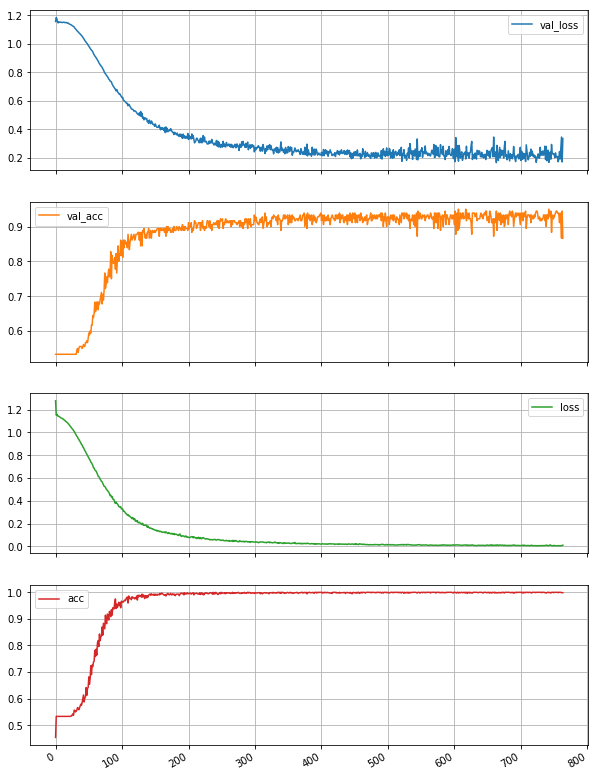

In [322]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [323]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [324]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "parthnay@buffalo.edu")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50291125")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 3  Correct :97
Testing Accuracy: 97.0
